<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/galaxy_Abell_2125.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Galaxy Cluster Abell 2125**

In [ ]:
!pip install astropy astroquery matplotlib numpy requests -q
from astroquery.ipac.irsa import Irsa
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
from astropy import coordinates
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from astroquery.heasarc import Heasarc
%matplotlib inline

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_1831.jpg)

Abell 2125 is not a single galaxy; it is a **galaxy cluster**, which is a large collection of galaxies bound together by gravity. It is located in the constellation **Ursa Minor**. Abell 2125 is known for its complex structure, as it is believed to be in the process of merging, making it a particularly dynamic and interesting cluster to study.

Abell 2125 is approximately **3 billion light-years away** from Earth, which corresponds to a redshift $z \approx 0.246 $. This distance places it in the **distant universe**, allowing astronomers to study large-scale structure formation and galaxy evolution.

The Chandra X-ray Observatory orbiting Earth has been studying Abell 2125 closely (3 Milliarden Lichtjahre Entfernung). The cluster is close enough to us to study it in detail, but far enough away that the images show an early, and therefore still quite active, stage in its evolution.
* The X-ray images also show something that optical images do not: the cluster is formed by the merger of many smaller clusters. The upper cluster, which emits the strongest X-rays, has a knotty structure, indicating that it has only recently come together.
* The spectrum reveals that it is enriched in heavy elements such as iron, and the close-up images clearly show that the system is still continuously absorbing gas from other galaxies, such as C153.
* This gas carries with it heavy elements produced in supernova explosions and spreads them out into the intergalactic medium.
* A fainter cloud of almost the same size, containing hundreds of other galaxies, contains remarkably few heavy elements, suggesting that the gas extraction is increasing over time and that this cloud is much younger than its fainter neighbor.

In [ ]:
# Define object (Galaxy name)
object_name = 'Abell 2125'

In [ ]:
# Get and set skycoordinates of object
skyobject = Simbad.query_object(object_name)
ra_hms = skyobject['RA'][0]
dec_dms = skyobject['DEC'][0]
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
print(skyobject)
print("\nCoordinates:")
print("RA (h:m:s):", ra_hms)
print("DEC (d:m:s):", dec_dms)

 MAIN_ID      RA        DEC    RA_PREC ... COO_WAVELENGTH     COO_BIBCODE     SCRIPT_NUMBER_ID
           "h:m:s"    "d:m:s"          ...                                                    
--------- ---------- --------- ------- ... -------------- ------------------- ----------------
ACO  2125 15 41 14.1 +66 15 57       5 ...              X 2008ApJ...682..821C                1

Coordinates:
RA (h:m:s): 15 41 14.1
DEC (d:m:s): +66 15 57


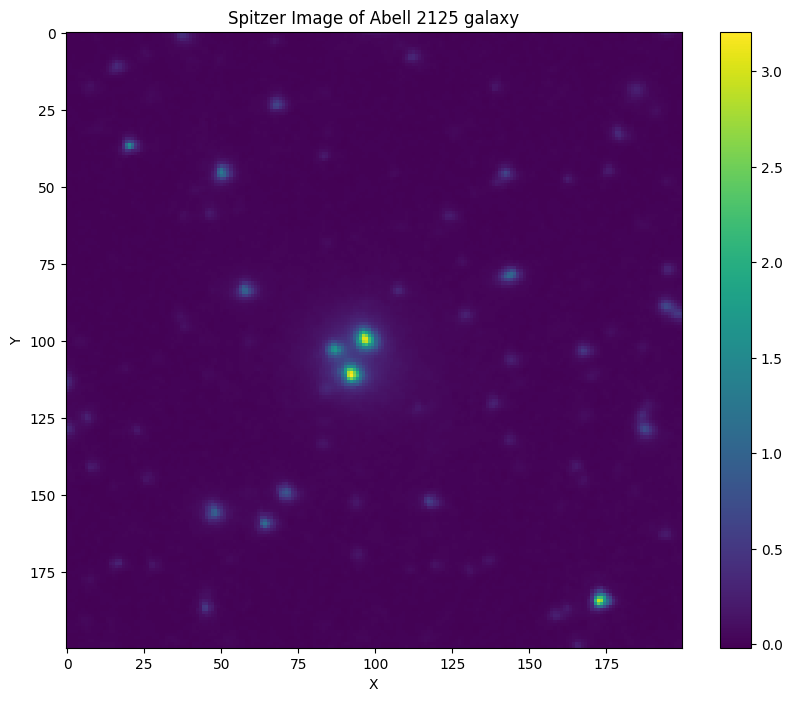

In [ ]:
# Simple image access queries from IRSA for galaxy images from Spitzer telescope
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][0] # Open cutout image for one science image
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='viridis')
plt.colorbar()
plt.title(f'Spitzer Image of {object_name} galaxy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

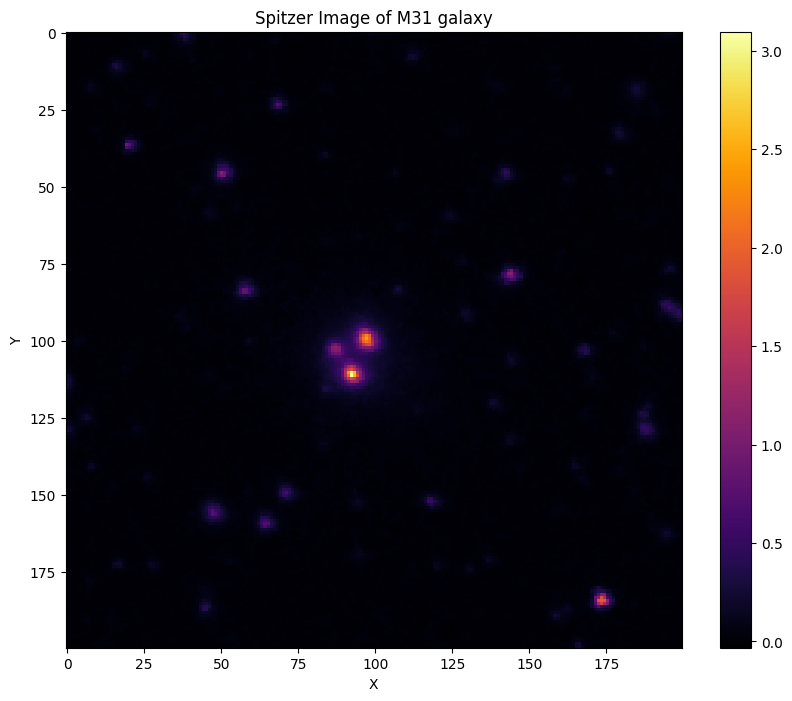

In [ ]:
# Simple image access queries from IRSA for M31 galaxy images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][1]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='inferno')
plt.colorbar()
plt.title(f'Spitzer Image of {object_name} galaxy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

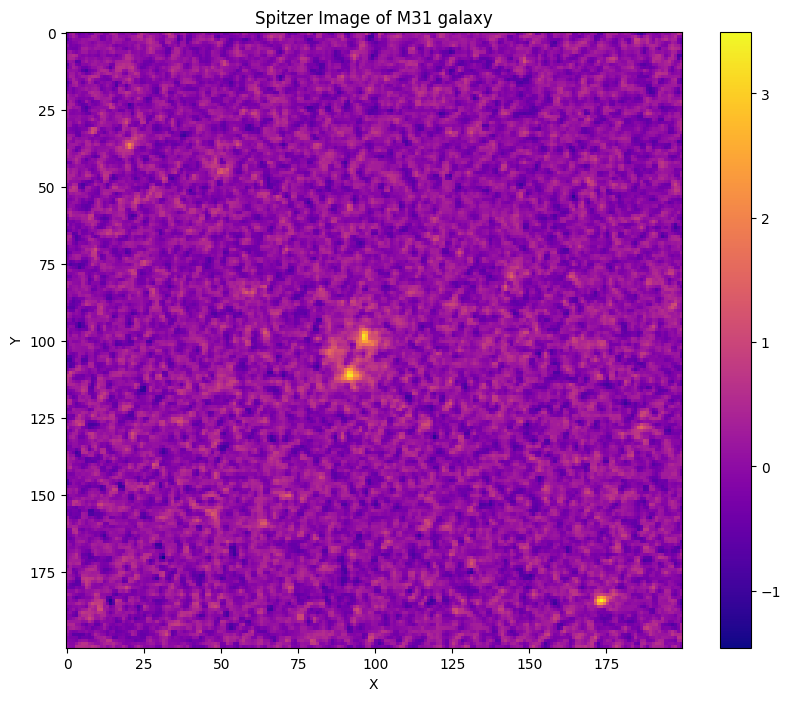

In [ ]:
# Simple image access queries from IRSA for M31 galaxy images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Open a cutout image for one of the science images
science_image = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'][7]
with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
    cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

plt.figure(figsize=(10, 8))
plt.imshow(cutout.data, cmap='plasma')
plt.colorbar()
plt.title(f'Spitzer Image of {object_name} galaxy')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# How many science picture are therein spitzer_images?
science_images_count = len(spitzer_images[spitzer_images['dataproduct_subtype'] == 'science'])
print("Number of science images:", science_images_count)

Number of science images: 18


<ipython-input-13-eeb0f398cb9d>:6: DeprecationWarning: the ``irsa`` module has been moved to astroquery.ipac.irsa, please update your imports.
  from astroquery.irsa import Irsa


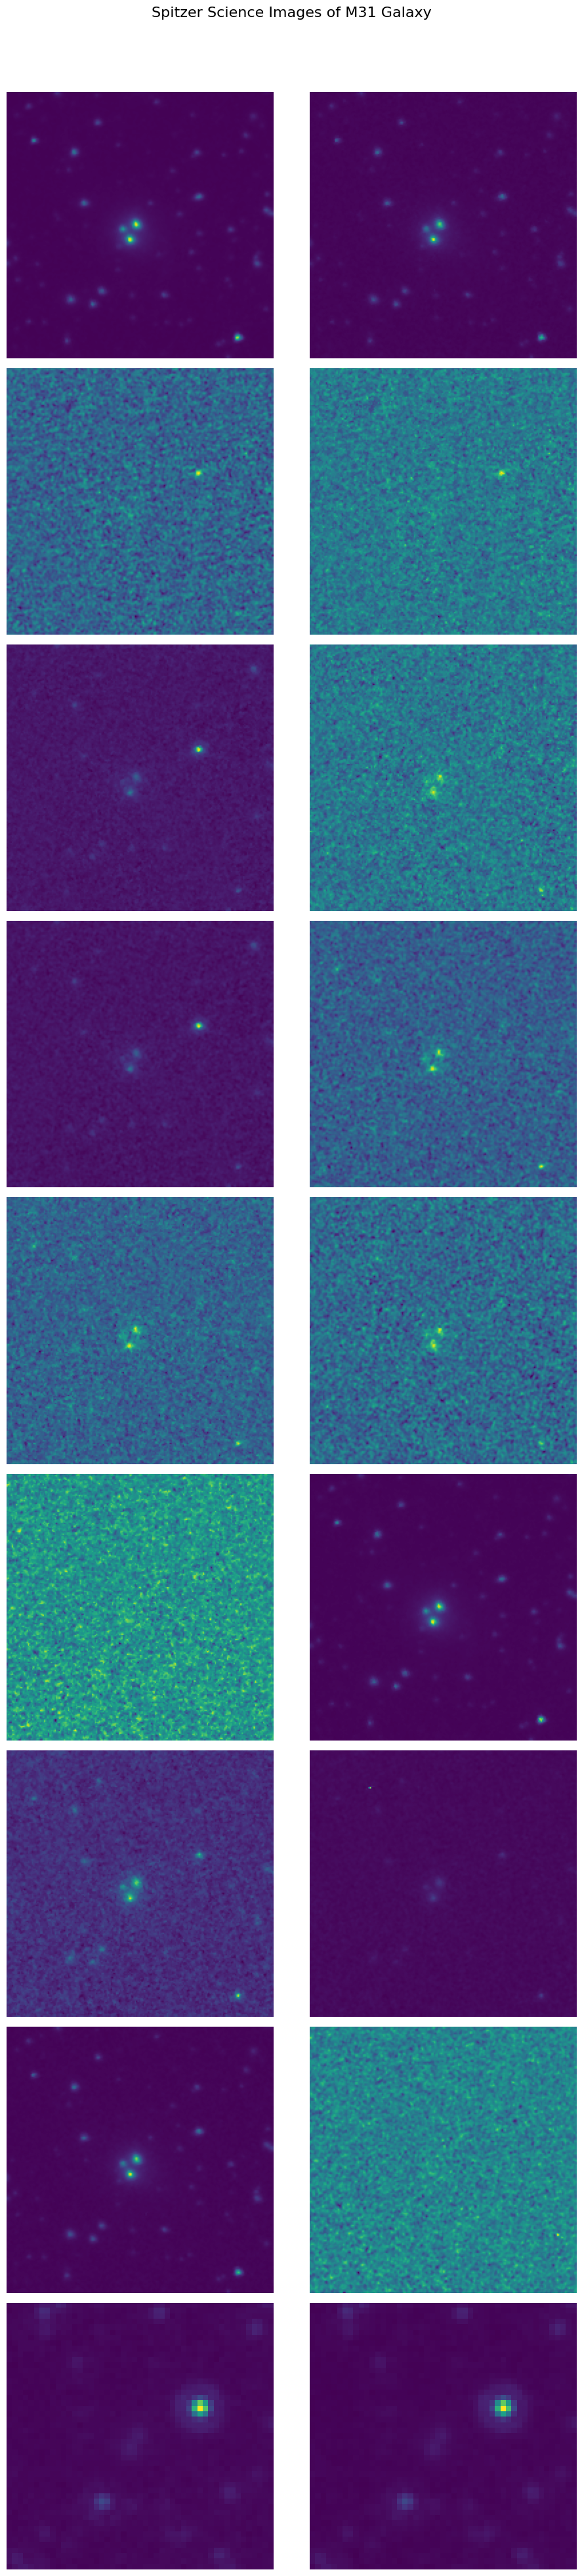

In [ ]:
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.io import fits
import astropy.units as u
from astroquery.irsa import Irsa
from astropy.coordinates import SkyCoord

# Simple image access queries from IRSA for M31 galaxy images from Spitzer telescope
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
spitzer_images = Irsa.query_sia(pos=(coord, 1 * u.arcmin), collection='spitzer_seip').to_table()

# Filter for science images only
science_images = spitzer_images[spitzer_images['dataproduct_subtype'] == 'science']

# Set up the figure for a 16x2 grid (2 images per row, 16 rows)
fig, axes = plt.subplots(9, 2, figsize=(10, 40))  # Adjust figsize for clarity

# Loop through each of the science images of the total 32 images
for i in range(18):
    # Access each science image URL
    science_image = science_images[i]
    with fits.open(science_image['access_url'], use_fsspec=True) as hdul:
        cutout = Cutout2D(hdul[0].section, position=coord, size=2 * u.arcmin, wcs=WCS(hdul[0].header))

    # Plot the cutout in the grid
    ax = axes[i // 2, i % 2]  # Calculate row and column for 2 images per row
    ax.imshow(cutout.data, cmap='viridis')
    ax.axis('off')  # Hide axes for clarity

plt.title(f'Spitzer Image of {object_name} galaxy', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the title
plt.show()


**Get more details about the file**

In [ ]:
hdul = fits.open(science_image['access_url'], use_fsspec=True)

In [ ]:
# Print the file information
hdul.info()

Filename: <class 'fsspec.implementations.http.HTTPFile'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      77   (1034, 1039)   float32   


In [ ]:
#  Access the primary HDU (Header/Data Unit) to get the data
primary_hdu = hdul[0]
data = primary_hdu.data
print(primary_hdu.header) # Display the header to learn more about the file
print(repr(hdul[0].header))  # Science data HDU header

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel - floating point                NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 1034 / X axis length                                  NAXIS2  =                 1039 / Y axis length                                  ORIGIN  = 'Spitzer Super-Mosaic Pipeline' / Origin of these image data          CREATOR = 'Spitzer Science Center' / Creator of this FITS file                                                                                                            / TIME AND EXPOSURE INFORMATION                                                                                                                       TELESCOP= 'Spitzer '           / Name of Telescope                              INSTRUME= 'MIPS    '           / Name of Instrument                             CHNLNUM =                    1 / Instrum

In [ ]:
# Close the FITS file
hdul.close()